In [1]:
#compare different polynomial regression models

#random dataset
import numpy as np
x = np.random.uniform(0, 10, 100)
x

array([2.06379278, 4.0400227 , 4.42600845, 9.67230375, 1.6300694 ,
       8.84146328, 8.19954204, 2.72532056, 2.78753505, 8.05775599,
       0.26131702, 2.59726294, 9.88330987, 2.41176172, 5.36026143,
       3.39104253, 9.03909771, 5.9092979 , 8.79931076, 2.38405669,
       7.72755215, 0.06393864, 7.5072726 , 0.05532205, 8.55350372,
       7.91629852, 2.43000936, 0.61560588, 9.67512448, 6.14464341,
       6.3585487 , 6.82714255, 4.33250551, 9.36438431, 2.00228712,
       0.55328644, 4.42584922, 3.48447157, 4.40930656, 2.71207109,
       9.58544678, 2.99739707, 5.77273456, 4.48521153, 8.87082009,
       5.42005236, 1.91792773, 0.32581256, 8.12055948, 2.63032958,
       6.70577452, 5.30470554, 9.01126111, 1.08701279, 6.77530788,
       4.88020265, 0.6862105 , 9.42027939, 2.43250429, 3.41794166,
       5.90447105, 0.02661074, 3.05767364, 6.77084953, 0.71487672,
       3.3653356 , 0.58987732, 9.81493616, 3.91589547, 6.55862932,
       3.50909702, 1.78798293, 7.59467604, 4.14473528, 1.19687

In [2]:
import pandas as pd
df = pd.DataFrame({"x": x})
df

,x
0,2.063793
1,4.040023
2,4.426008
3,9.672304
4,1.630069
...,...
95,3.353422
96,9.545959
97,5.182050
98,2.862929


<AxesSubplot:xlabel='x', ylabel='y'>

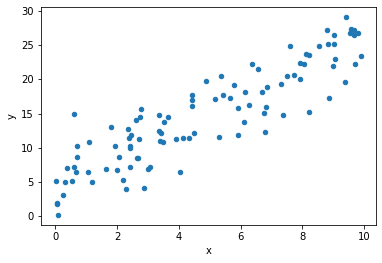

In [3]:
#y = 2x + 5, add the y column and plot the relationship
df["y"] = df["x"] * 2 + 5 + np.random.normal(scale=3, size=100) #adds random noise
df.plot.scatter(x="x", y="y")

<AxesSubplot:xlabel='x', ylabel='y'>

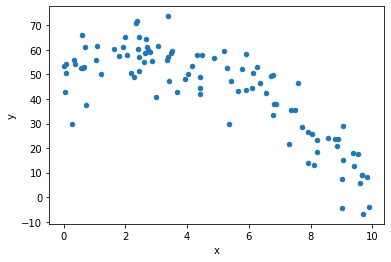

In [4]:
#now for y = 5x - x^2 + 50
df["y"] = df["x"] * 5 - df["x"]**2 + 50 + np.random.normal(scale=8, size=100) 
df.plot.scatter(x="x", y="y")

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

train, test = train_test_split(df)
len(train), len(test)

(75, 25)

In [6]:
#2nd degree regression model pipeline
scores_df = pd.DataFrame()

degree = 2
model = Pipeline([
    ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
    ("model", LinearRegression()),
])
scores = cross_val_score(model, train[["y"]], train["x"])
scores_df.at[f"degree {degree}", "score"] = scores.mean()
scores_df.at[f"degree {degree}", "std_dev"] = scores.std()
scores_df

,score,std_dev
degree 2,0.433335,0.352408


<AxesSubplot:>

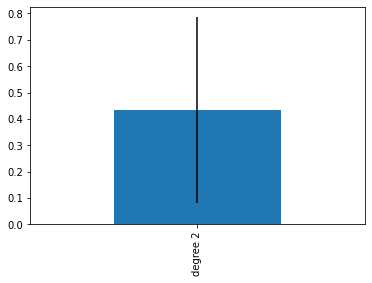

In [7]:
#one bar plot showing average explained variance of the model and the standard devation of the scores
scores_df["score"].plot.bar(yerr=scores_df["std_dev"])

<AxesSubplot:>

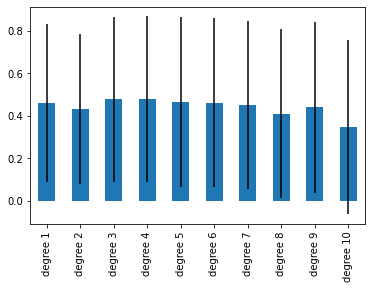

In [19]:
#n degree models
scores_df = pd.DataFrame()

for degree in range(1, 11):
    degree = degree
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("model", LinearRegression()),
    ])
    scores = cross_val_score(model, train[["y"]], train["x"])
    scores_df.at[f"degree {degree}", "score"] = scores.mean()
    scores_df.at[f"degree {degree}", "std_dev"] = scores.std()
    
scores_df["score"].plot.bar(yerr=scores_df["std_dev"])